In [46]:
from utils.import_list import *
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
sz = np.array([[1, 0], [0, -1]])
sx = np.array([[0, 1], [1, 0]])
one = np.eye(2)

In [48]:
def onsite(size):
    mats = list()
    for i in range(size):
        temp = [one] * size
        temp[i] = sx
        mat = functools.reduce(np.kron, temp)
        mats.append(mat)
    want = sum(mats)
    return want
def twosite(size):
    mats = list()
    for i in range(size):
        temp = [one] * size
        temp[(i)%size] = sz
        temp[(i+1)%size] = sz
        mat = functools.reduce(np.kron, temp)
        mats.append(mat)
    want = sum(mats)
    return want
def opera(size, dif):
    mats = list()
    # mats.append(functools.reduce(np.kron, [zero] * size))
    for i in range(size):
        temp = [one] * (size)
        temp[(i)%(size )] = sz
        temp[(i+dif)%(size)] = sz
        mat = functools.reduce(np.kron, temp)
        # tra = qiskit.quantum_info.partial_trace(mat, [0])    
        mats.append(np.array(mat))
    want = sum(mats) / len(mats)
    return want

In [49]:
size = 7
ham = - onsite(size) - twosite(size)
b = np.linalg.eigh(ham)

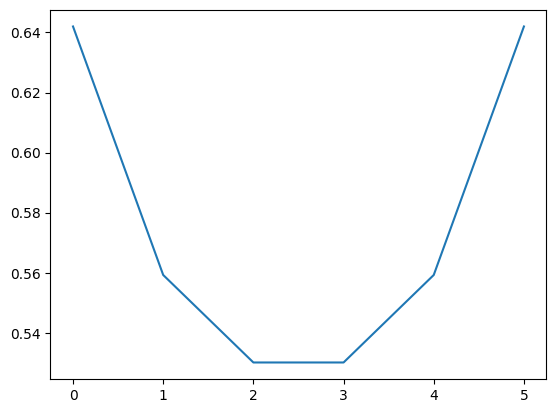

In [50]:
vec = b[1][:, 0]
res = list()
size = 7
for i in range(size):
    oper = opera(7, i)
    re = np.einsum('a, ab, b', vec.conjugate(), oper, vec)
    res.append(re)
res = np.array(res[1:], dtype=float)
plt.plot(range(len(res)), res)

In [66]:
wil = pickle.load(open("wil", "rb"))
noise_sim = Simulator(wil.hyperbolic_structure, "sim", "automatic", False, "ibmq_lima")
name = "data/circuit_configs1/attempt_" + str(8) + "/qc_" + str(10000) + ".qc"
qc = pickle.load(open(name, "rb"))
noise_sim.accept(qc)

ibmqfactory.load_account:WARNING:2022-11-02 16:31:22,675: Credentials are already in use. The existing account in the session will be replaced.


-8.6457

In [67]:
for i in range(10):
    name = "data/circuit_configs1/attempt_" + str(i) + "/qc_" + str(10000) + ".qc"
    qc = pickle.load(open(name, "rb"))
    print(noise_sim.accept(qc))

-8.6796
-8.6199
-8.6565
-8.575600000000001
-8.5959
-8.6079
-8.5074
-8.5627
-8.633199999999999
-8.6073


In [68]:
stv = (qiskit.quantum_info.Statevector.from_instruction(qc))
tr_stv = qiskit.quantum_info.partial_trace(stv, [0])

C:\Users\HP\AppData\Local\Temp\ipykernel_11556\1048071874.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  res = np.array(res[1:], dtype=float)


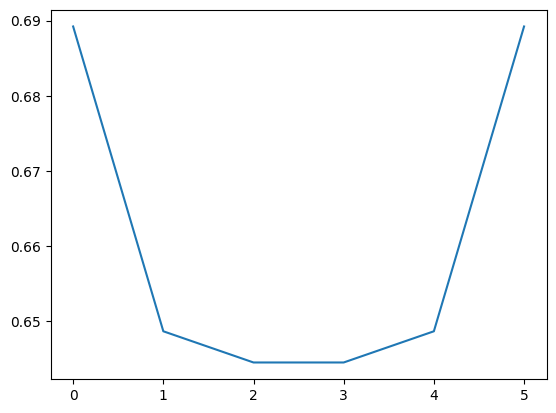

In [69]:
res = list()
size = 7
for i in range(size):
    oper = opera(7, i)
    re = DensityMatrix(np.multiply(tr_stv, oper)).trace()
    res.append(re)
res = np.array(res[1:], dtype=float)
plt.plot(range(len(res)), res)

In [70]:
noise_sim = Simulator(wil.hyperbolic_structure, "sim", "automatic", True, "ibmq_lima")
a = noise_sim.correspondance_with_error(qc, M=20)[:-1]

ibmqfactory.load_account:WARNING:2022-11-02 16:31:53,563: Credentials are already in use. The existing account in the session will be replaced.


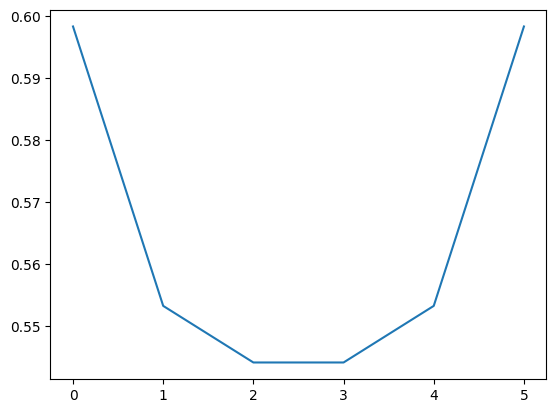

In [71]:
plt.plot(range(len(a)), a)